# End-to-end Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1.Problem
Identifying the breed of a dog given an image of a dog.

Given a photo of a dog, we want to know breed of the dog.

## 2. Data

The data we're using is from Kaggle's dog breeed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilites for each dog breed for each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data), so we are using deep learning/transfer learning.

* There are 120 breeds of dogs (this means there are 120 different classes).

* There are around 10000+ images in the training set (these images have labels).

* There are around 10000+ images in the test set( labels of these images are to be predicted).


###  Get our workspace ready




In [33]:
# Import necessary tools

import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import pandas as pd

print("TF version",tf.__version__)
print('TF hub version',hub.__version__)

# Check for GPU availabality
print ('GPU','available' if tf.config.list_physical_devices('GPU')else 'not available')

TF version 2.3.0
TF hub version 0.9.0
GPU available


## Getting our data ready (turning into Tensors)

For all machine learning models, our data has to be in numerical format. 

In [18]:
#Checkout the labels of our data
import pandas as pd
labels_csv=pd.read_csv("/content/drive/My Drive/dogbreeddata/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     c7c952acb35ee96c30f4e6dd14241efc  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


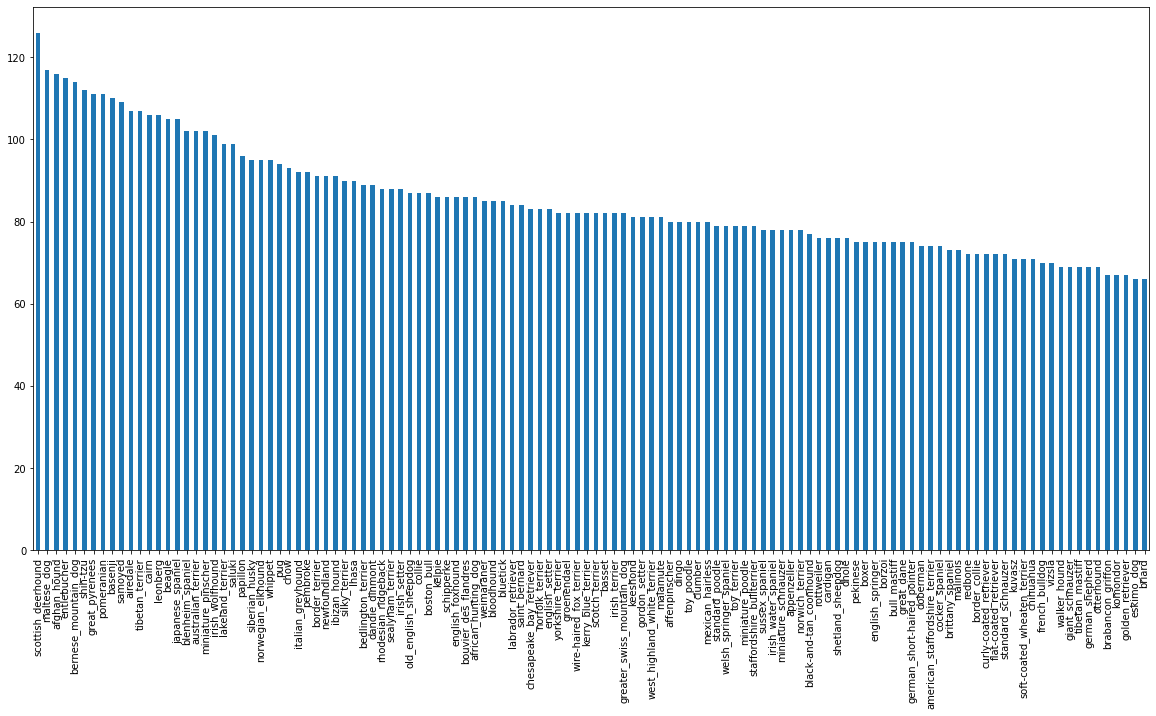

In [19]:
# No of images for each breed

labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [20]:
labels_csv['breed'].value_counts().median()

82.0

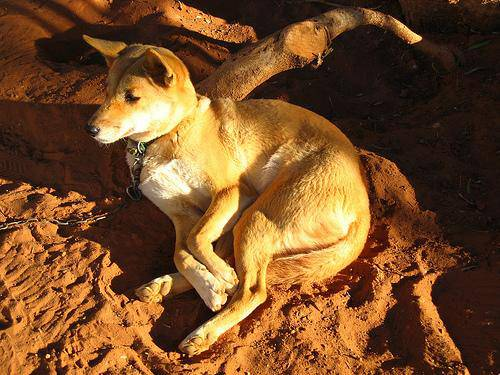

In [21]:
#Let's view an image

from IPython.display import Image

Image('/content/drive/My Drive/dogbreeddata/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels

Getting list of all our image file pathnames

In [22]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [26]:
#Create pathnames from image ID's

filenames=['/content/drive/My Drive/dogbreeddata/train/'+fname+'.jpg' for fname in labels_csv.id]

filenames[:10]

['/content/drive/My Drive/dogbreeddata/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/dogbreeddata/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/dogbreeddata/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/dogbreeddata/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/dogbreeddata/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/dogbreeddata/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/dogbreeddata/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/dogbreeddata/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/dogbreeddata/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/dogbreeddata/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [29]:
#Check no of filenames matches number of actual image files

import os

if len(os.listdir('/content/drive/My Drive/dogbreeddata/train'))==len(filenames):
  print('Filenames match actual amount of files')
else:
  print('Filenames doesnt match actual amount of files')



Filenames match actual amount of files


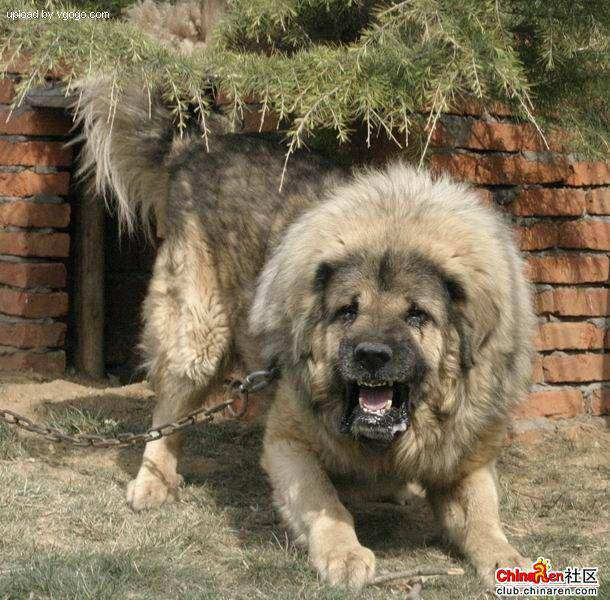

In [28]:
Image(filenames[9000])

In [31]:
labels_csv['breed'][9000]

'tibetan_mastiff'

With training image filepaths in a list, we need to prepare our labels

In [34]:
import numpy as np
labels= labels_csv['breed']
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [36]:
# Check if number items matches the number of filenames

if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
    print('Number of labels does not match number of filenames')

Number of labels matches number of filenames!


In [45]:
# Find the unique label values

unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [46]:
#Turn a single label into a array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [47]:
# Turn every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [48]:
# Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in a boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the dataset from Kaggle doesn't come with validation set.. we are making our own.

In [49]:
# Setup X and y variables

X=filenames
y=boolean_labels

Starting off experimentation with ~1000 images and increase as need

In [53]:
#Set a number of images to use for experimenting

NUM_IMAGES= 2000  #@param {type:"slider",min:1000,max:10000,step :1000}

In [55]:
#Lets split our data into train and validation sets

from sklearn.model_selection import train_test_split

#Split them into training and validation of total NUM_IMAGES

X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)
print(len(X_train), len(y_train), len(X_val), len(y_val))

800 800 200 200


In [56]:
X_train[:2],y_train[:2]

(['/content/drive/My Drive/dogbreeddata/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/dogbreeddata/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, 

## Preprocessing Images (Turning Images into Tensors)


To preprocess our images to Tensors, we're going to write a function for:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

In [66]:
#Convert image to Numpy array

from matplotlib.pyplot import imread


image=imread(filenames[72])

#Turn image into tensor
tf.constant(image[:2])

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[228, 246, 250],
        [229, 247, 251],
        [230, 248, 252],
        ...,
        [ 63,  84, 103],
        [ 80, 101, 120],
        [ 87, 108, 127]],

       [[228, 246, 250],
        [229, 247, 251],
        [230, 248, 252],
        ...,
        [ 56,  77,  96],
        [ 74,  95, 114],
        [ 78,  99, 118]]], dtype=uint8)>

In [70]:
#Define image size
IMG_SIZE= 224

#Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  #Read in an image file
  image= tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
  image=tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value (224,224)
  image=tf.image.resize(image,size= [IMG_SIZE,IMG_SIZE])
  
  return image